<a href="https://colab.research.google.com/github/Clevincio/drugdicovery_chembl/blob/main/drugdiscoveryB_lipinski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# installing rdkit and conda
# inspired by dataproffessor free code camp
#https://colab.research.google.com/corgiredirector?site=http%3A%2F%2Fyoutube.com%2Fdataprofessor
!pip install --upgrade rdkit
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [32]:
# function to calculate lapinskis descriptors
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

Loading previously made data

In [34]:
df = pd.read_csv("drugdiscovery_partA")
df

,molecule_chembl_id,canonical_smiles,standard_value,activity_class
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,inactive
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,inactive
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,inactive
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,inactive
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active
...,...,...,...,...
1133,CHEMBL5220196,CC(C)C[C@H](NC(=O)OCCC12CC3CC(CC(C3)C1)C2)C(=O...,250.0,inactive
1134,CHEMBL5220377,CC(C)C[C@H](NC(=O)OCC12CC3CC(CC(O)(C3)C1)C2)C(...,820.0,inactive
1135,CHEMBL5219749,CC(C)C[C@H](NC(=O)OCC12CC3CC(CC(O)(C3)C1)C2)C(...,1030.0,inactive
1136,CHEMBL5218884,[2H]C([2H])(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C...,740.0,inactive


In [38]:
df_no_smiles = df.drop(columns='canonical_smiles')

Processing CanonicalSmiles column in the df, splitting each value by period. The longest part is selected (representing the most detailed notation and creating a new pandas series)

In [39]:
smiles = []
for elem in df.canonical_smiles.tolist():
  cpd = str(elem).split(".")
  cpd_longest =max(cpd, key= len)
  smiles.append(cpd_longest)
smiles = pd.Series(smiles, name= "canonical_smiles")

In [41]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,activity_class,canonical_smiles
0,CHEMBL480,390.0,inactive,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1
1,CHEMBL178459,210.0,inactive,Cc1c(-c2cnccn2)ssc1=S
2,CHEMBL3545157,80.0,inactive,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1
3,CHEMBL297453,1580.0,inactive,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...
4,CHEMBL4303595,40.0,active,O=C1C=Cc2cc(Br)ccc2C1=O
...,...,...,...,...
1133,CHEMBL5220196,250.0,inactive,CC(C)C[C@H](NC(=O)OCCC12CC3CC(CC(C3)C1)C2)C(=O...
1134,CHEMBL5220377,820.0,inactive,CC(C)C[C@H](NC(=O)OCC12CC3CC(CC(O)(C3)C1)C2)C(...
1135,CHEMBL5219749,1030.0,inactive,CC(C)C[C@H](NC(=O)OCC12CC3CC(CC(O)(C3)C1)C2)C(...
1136,CHEMBL5218884,740.0,inactive,[2H]C([2H])(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C...


Calculating lipinski descriptors from the function earlier made

In [42]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,369.368000,3.51522,1.0,4.0
1,226.351000,3.30451,0.0,5.0
2,334.400000,3.26220,0.0,5.0
3,458.375000,2.23320,8.0,11.0
4,237.052000,2.22770,0.0,2.0
...,...,...,...,...
1133,556.702000,1.60840,4.0,8.0
1134,477.602000,1.66850,4.0,6.0
1135,558.674000,0.33320,5.0,9.0
1136,479.614204,1.66850,4.0,6.0


In [43]:
#combining the data frames
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,activity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,inactive,369.368000,3.51522,1.0,4.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,inactive,226.351000,3.30451,0.0,5.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,inactive,334.400000,3.26220,0.0,5.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,inactive,458.375000,2.23320,8.0,11.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active,237.052000,2.22770,0.0,2.0
...,...,...,...,...,...,...,...,...
1133,CHEMBL5220196,CC(C)C[C@H](NC(=O)OCCC12CC3CC(CC(C3)C1)C2)C(=O...,250.0,inactive,556.702000,1.60840,4.0,8.0
1134,CHEMBL5220377,CC(C)C[C@H](NC(=O)OCC12CC3CC(CC(O)(C3)C1)C2)C(...,820.0,inactive,477.602000,1.66850,4.0,6.0
1135,CHEMBL5219749,CC(C)C[C@H](NC(=O)OCC12CC3CC(CC(O)(C3)C1)C2)C(...,1030.0,inactive,558.674000,0.33320,5.0,9.0
1136,CHEMBL5218884,[2H]C([2H])(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C...,740.0,inactive,479.614204,1.66850,4.0,6.0


Converting ic50 to pic50

In [44]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(data):
    pIC50 = []

    for i in data['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))
    data['pIC50'] = pIC50
    x = data.drop('standard_value_norm', 1)

    return x

In [45]:
def norm_value(data):
    norm = []

    for i in data['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    data['standard_value_norm'] = norm
    x = data.drop('standard_value', 1)

    return x

The norm value function will first be applied so that the data is normalised

In [46]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-45-44f5dd70b189>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = data.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,activity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,inactive,369.368000,3.51522,1.0,4.0,390.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,inactive,226.351000,3.30451,0.0,5.0,210.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,inactive,334.400000,3.26220,0.0,5.0,80.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,inactive,458.375000,2.23320,8.0,11.0,1580.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052000,2.22770,0.0,2.0,40.0
...,...,...,...,...,...,...,...,...
1133,CHEMBL5220196,CC(C)C[C@H](NC(=O)OCCC12CC3CC(CC(C3)C1)C2)C(=O...,inactive,556.702000,1.60840,4.0,8.0,250.0
1134,CHEMBL5220377,CC(C)C[C@H](NC(=O)OCC12CC3CC(CC(O)(C3)C1)C2)C(...,inactive,477.602000,1.66850,4.0,6.0,820.0
1135,CHEMBL5219749,CC(C)C[C@H](NC(=O)OCC12CC3CC(CC(O)(C3)C1)C2)C(...,inactive,558.674000,0.33320,5.0,9.0,1030.0
1136,CHEMBL5218884,[2H]C([2H])(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C...,inactive,479.614204,1.66850,4.0,6.0,740.0


Running the convertion function

In [47]:
final_dataframe = pIC50(df_norm)
final_dataframe

<ipython-input-44-0f660f0111f6>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = data.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,activity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,inactive,369.368000,3.51522,1.0,4.0,6.408935
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,inactive,226.351000,3.30451,0.0,5.0,6.677781
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,inactive,334.400000,3.26220,0.0,5.0,7.096910
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,inactive,458.375000,2.23320,8.0,11.0,5.801343
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052000,2.22770,0.0,2.0,7.397940
...,...,...,...,...,...,...,...,...
1133,CHEMBL5220196,CC(C)C[C@H](NC(=O)OCCC12CC3CC(CC(C3)C1)C2)C(=O...,inactive,556.702000,1.60840,4.0,8.0,6.602060
1134,CHEMBL5220377,CC(C)C[C@H](NC(=O)OCC12CC3CC(CC(O)(C3)C1)C2)C(...,inactive,477.602000,1.66850,4.0,6.0,6.086186
1135,CHEMBL5219749,CC(C)C[C@H](NC(=O)OCC12CC3CC(CC(O)(C3)C1)C2)C(...,inactive,558.674000,0.33320,5.0,9.0,5.987163
1136,CHEMBL5218884,[2H]C([2H])(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C...,inactive,479.614204,1.66850,4.0,6.0,6.130768


In [ ]:
final_dataframe.pIC50.describe()

count    1138.000000
mean        6.016533
std         1.127616
min         3.698970
25%         5.175386
50%         6.013228
75%         6.721246
max        10.886057
Name: pIC50, dtype: float64

Saving it as csv file

In [48]:
final_dataframe.to_csv("drugdiscoveryB_pic50.csv", index= False)

Performing mann whitney you test

In [26]:
def mannwhitney(descriptor):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'activity_class']
  df = final_dataframe[selection]
  active = df[df['activity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'activity_class']
  df = final_dataframe[selection]
  inactive = df[df['activity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

In [4]:
import seaborn as sns
sns.set(style="ticks")
import matplotlib.pyplot as plt


In [3]:
final_dataframe= pd.read_csv("drugdiscoveryB_pic50.csv")

In [6]:
final_dataframe

,molecule_chembl_id,canonical_smiles,activity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,inactive,369.368000,3.51522,1.0,4.0,6.408935
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,inactive,226.351000,3.30451,0.0,5.0,6.677781
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,inactive,334.400000,3.26220,0.0,5.0,7.096910
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,inactive,458.375000,2.23320,8.0,11.0,5.801343
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052000,2.22770,0.0,2.0,7.397940
...,...,...,...,...,...,...,...,...
1133,CHEMBL5220196,CC(C)C[C@H](NC(=O)OCCC12CC3CC(CC(C3)C1)C2)C(=O...,inactive,556.702000,1.60840,4.0,8.0,6.602060
1134,CHEMBL5220377,CC(C)C[C@H](NC(=O)OCC12CC3CC(CC(O)(C3)C1)C2)C(...,inactive,477.602000,1.66850,4.0,6.0,6.086186
1135,CHEMBL5219749,CC(C)C[C@H](NC(=O)OCC12CC3CC(CC(O)(C3)C1)C2)C(...,inactive,558.674000,0.33320,5.0,9.0,5.987163
1136,CHEMBL5218884,[2H]C([2H])(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C...,inactive,479.614204,1.66850,4.0,6.0,6.130768


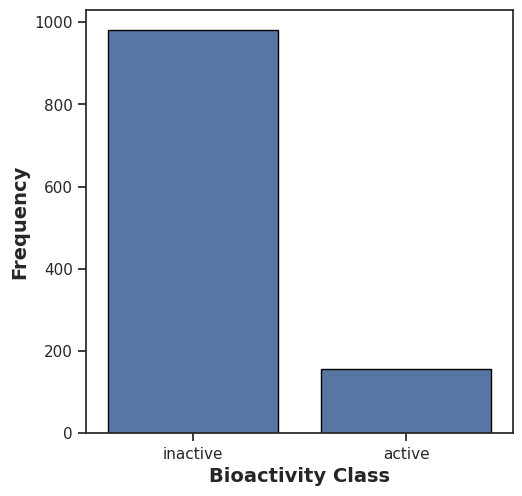

In [9]:
#frequency plot
plt.figure(figsize=(5.5, 5.5))
sns.countplot(x="activity_class", data =final_dataframe, edgecolor="black")

plt.xlabel("Bioactivity Class", fontsize= 14, fontweight= "bold")
plt.ylabel("Frequency", fontsize= 14, fontweight= "bold")
plt.savefig("freqplot.pdf")

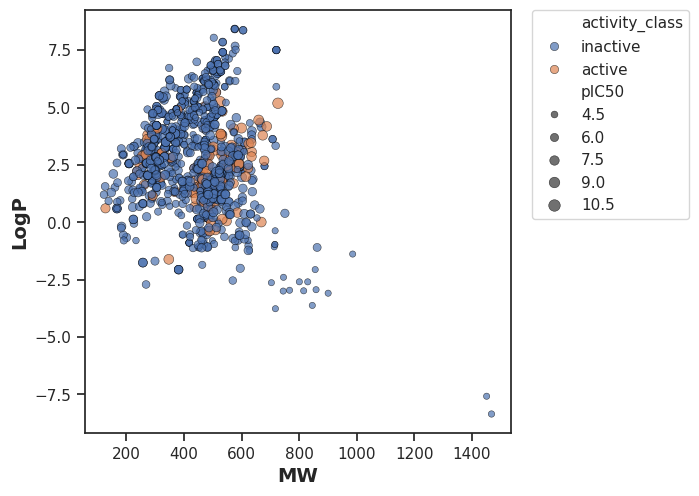

In [ ]:
#scatter plot
plt.figure(figsize=(5.5,5.5))

sns.scatterplot(x="MW",y="LogP",data=final_dataframe, hue="activity_class", size="pIC50",edgecolor="black", alpha=0.7)

plt.xlabel("MW",fontsize=14,fontweight="bold")
plt.ylabel("LogP",fontsize=14,fontweight="bold")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.savefig("plot_MW_VS_logp.pdf")


Box plots of each of the lipinskis descriptors and testing hypothesis using mannwhitney u test

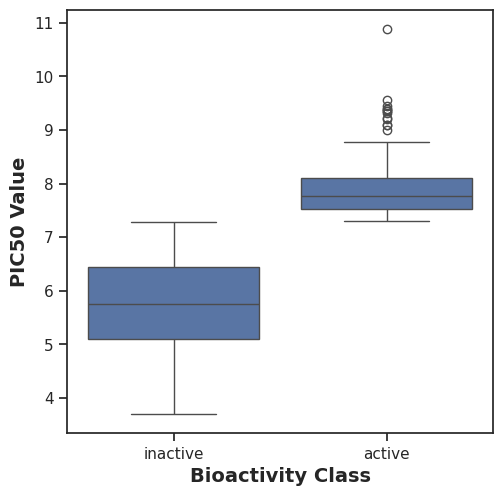

In [10]:
#pic50 box plot
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x="activity_class", y="pIC50",data=final_dataframe)

plt.xlabel("Bioactivity Class", fontsize= 14, fontweight="bold")
plt.ylabel("PIC50 Value", fontsize=14,fontweight="bold")
plt.savefig("plot_ic50.pdf")

In [25]:
#hypothesis testing
mannwhitney("pIC50")

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,154017.0,3.198141e-90,0.05,Different distribution (reject H0)


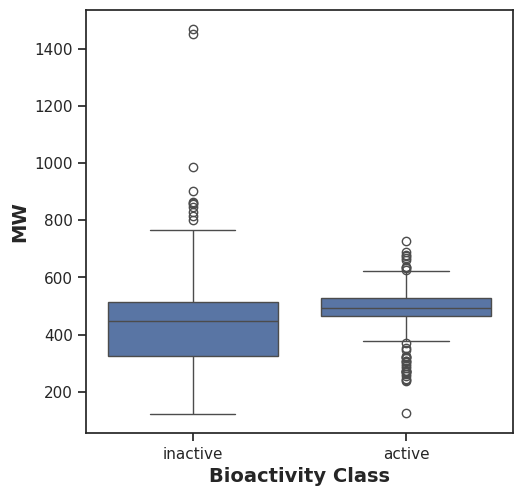

In [22]:
#MW box plot
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x="activity_class", y="MW",data=final_dataframe)

plt.xlabel("Bioactivity Class", fontsize= 14, fontweight="bold")
plt.ylabel("MW", fontsize=14,fontweight="bold")
plt.savefig("plot_MW.pdf")

In [30]:
#hypothesis testing
mannwhitney("MW")

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,96253.5,4.821020e-07,0.05,Different distribution (reject H0)


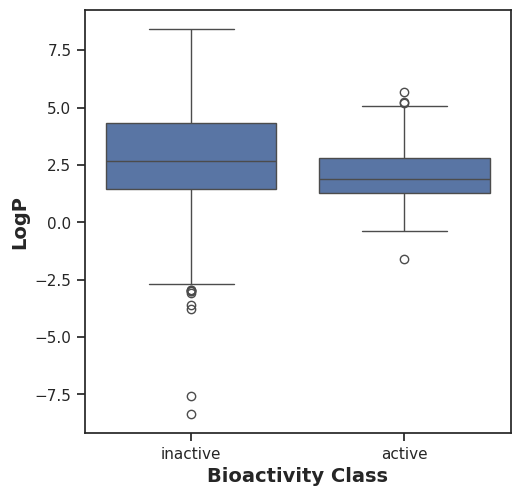

In [21]:
#LogP box plot
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x="activity_class", y="LogP",data=final_dataframe)

plt.xlabel("Bioactivity Class", fontsize= 14, fontweight="bold")
plt.ylabel("LogP", fontsize=14,fontweight="bold")
plt.savefig("plot_LogP.pdf")

In [29]:
#hypothesis testing
mannwhitney("LogP")

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,58355.0,0.000001,0.05,Different distribution (reject H0)


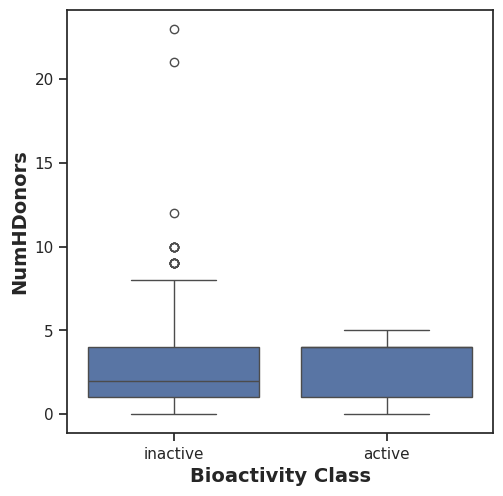

In [20]:
#NumHDonors box plot
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x="activity_class", y="NumHDonors",data=final_dataframe)

plt.xlabel("Bioactivity Class", fontsize= 14, fontweight="bold")
plt.ylabel("NumHDonors", fontsize=14,fontweight="bold")
plt.savefig("plot_NumHDonors.pdf")

In [28]:
#hypothesis testing
mannwhitney("NumHDonors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,94682.5,0.000002,0.05,Different distribution (reject H0)


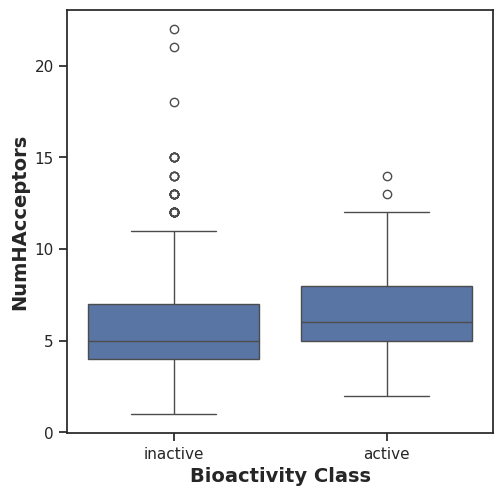

In [17]:
#NumHAcceptors box plot
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x="activity_class", y="NumHAcceptors",data=final_dataframe)

plt.xlabel("Bioactivity Class", fontsize= 14, fontweight="bold")
plt.ylabel("NumHAcceptors", fontsize=14,fontweight="bold")
plt.savefig("plot_NumHAcceptors.pdf")

In [27]:
#hypothesis testing
mannwhitney("NumHAcceptors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,93056.5,0.000022,0.05,Different distribution (reject H0)
